<a href="https://colab.research.google.com/github/vfrantc/deweather/blob/main/fixed_range_train_3stage_mydecomp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jul  2 11:27:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
t = torch.zeros([0, 1, 2])
t = t.cuda()

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
!git clone https://github.com/vfrantc/deweather.git

Cloning into 'deweather'...
remote: Enumerating objects: 345, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 345 (delta 59), reused 49 (delta 27), pack-reused 256
Receiving objects: 100% (345/345), 10.51 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (182/182), done.


In [ ]:
%cd deweather/TransWeather-3stage

/content/deweather/TransWeather-3stage


In [ ]:
!cp /content/drive/MyDrive/deweather/dehaze_15ep.zip .
!unzip dehaze_15ep.zip

Archive:  dehaze_15ep.zip
   creating: Transweather/
  inflating: Transweather/best       
  inflating: Transweather/latest     


In [ ]:
!mkdir trained
!cp Transweather/best trained/

In [ ]:
!cp /content/drive/MyDrive/deweather2/decomp.tar .

In [ ]:
!cp /content/drive/MyDrive/derain/data.zip .
!unzip data.zip
!mkdir ./training_log

Streaming output truncated to the last 5000 lines.
  inflating: data/train/allweather/input/beautiful_smile_03531.jpg  
  inflating: __MACOSX/data/train/allweather/input/._beautiful_smile_03531.jpg  
  inflating: data/train/allweather/input/64_rain.png  
  inflating: __MACOSX/data/train/allweather/input/._64_rain.png  
  inflating: data/train/allweather/input/139_rain.png  
  inflating: __MACOSX/data/train/allweather/input/._139_rain.png  
  inflating: data/train/allweather/input/parking_lot_06697.jpg  
  inflating: __MACOSX/data/train/allweather/input/._parking_lot_06697.jpg  
  inflating: data/train/allweather/input/im_0132_s90_a05.png  
  inflating: __MACOSX/data/train/allweather/input/._im_0132_s90_a05.png  
  inflating: data/train/allweather/input/im_0427_s95_a05.png  
  inflating: __MACOSX/data/train/allweather/input/._im_0427_s95_a05.png  
  inflating: data/train/allweather/input/city_read_11358.jpg  
  inflating: __MACOSX/data/train/allweather/input/._city_read_11358.jpg  
  in

In [ ]:
!pip install kornia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 512 kB 15.2 MB/s 


In [ ]:
!python3 train_stage3.py  -train_batch_size 16 -exp_name Transweather -epoch_start 0 -num_epochs 100

Seed:	19
--- Hyper-parameters for training ---
learning_rate: 0.0002
crop_size: [256, 256]
train_batch_size: 16
val_batch_size: 1
lambda_loss: 0.04
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100% 528M/528M [00:02<00:00, 214MB/s]
--- no weight loaded ---
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Rain Drop old_val_psnr: 55.02, old_val_ssim: 0.9707
Learning rate sets to 0.0002.
Epoch: 0, Iteration: 0
Epoch: 0, Iteration: 100
Epoch: 0, Iteration: 200
Epoch: 0, Iteration: 300
Epoch: 0, Iteration: 400
E

In [ ]:
!zip -r stage3_2.07.zip ./Transweather/
!cp stage3_2.07.zip /content/drive/MyDrive/deweather2

# Run the thing for future evaluation

In [ ]:
#!cp /content/drive/MyDrive/deweather2/stage3_27.06.zip .

In [ ]:
#!unzip stage3_27.06.zip

In [ ]:
!mkdir -p data/test
!cp /content/drive/MyDrive/deweather2/input.zip .
!unzip input.zip
!cp -r input data/test/
!cp input/natural.txt data/test/input.txt
!mkdir natural_results
!mkdir -p data/test/gt
!cp -r input/input data/test/gt/gt

In [ ]:
!python test_real.py -exp_name=./Transweather

In [ ]:
!zip -r out4.zip ./Transweather
!cp out4.zip /content/drive/MyDrive/deweather2

# ÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆÆ

0 234


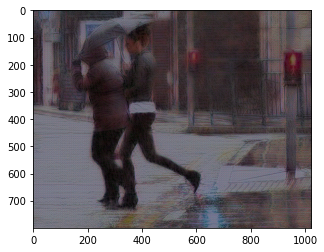

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('results/natural/Transweather/006.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.min(), image.max())
plt.imshow(image)
plt.show()

In [ ]:
!ls results/natural/Transweather

Transweather


In [ ]:
!zip -r results_3stage_50ep.zip ./results/
!cp results_3stage_50ep.zip /content/drive/MyDrive/deweather2/

  adding: results/ (stored 0%)
  adding: results/natural/ (stored 0%)
  adding: results/natural/Transweather/ (stored 0%)
  adding: results/natural/Transweather/008.png (deflated 0%)
  adding: results/natural/Transweather/368.png (deflated 0%)
  adding: results/natural/Transweather/476.png (deflated 0%)
  adding: results/natural/Transweather/660.png (deflated 0%)
  adding: results/natural/Transweather/628.png (deflated 0%)
  adding: results/natural/Transweather/232.png (deflated 0%)
  adding: results/natural/Transweather/520.png (deflated 0%)
  adding: results/natural/Transweather/656.png (deflated 0%)
  adding: results/natural/Transweather/591.png (deflated 0%)
  adding: results/natural/Transweather/371.png (deflated 0%)
  adding: results/natural/Transweather/640.png (deflated 0%)
  adding: results/natural/Transweather/573.png (deflated 0%)
  adding: results/natural/Transweather/587.png (deflated 0%)
  adding: results/natural/Transweather/313.png (deflated 0%)
  adding: results/natura

# Run on synthetic

In [ ]:
!rm -rf results/natural

In [ ]:
!python test_snow100k.py -exp_name=./Transweather

In [ ]:
!python ./test_test1.py -exp_name=./Transweather

In [ ]:
!zip -r results_star_my.zip ./results/
!cp results_star_my.zip drive/MyDrive/derain/